# Clustering

## Problem 1: Segment Customers

The problem that we are going to solve in this assignment is to segment customers into different groups based on their shopping trends.

In [0]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load data

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [2]:
# load the data
shopping_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/shopping_data.csv')
shopping_data.rename(
    columns={
        'CustomerID': 'customer_id',
        'Genre': 'genre',
        'Age': 'age',
        'Annual Income (k$)': 'annual_income',
        'Spending Score (1-100)': 'spending_score'
    },
    inplace=True
)
display(shopping_data.head())



,customer_id,genre,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# TODO: retain only anual_income and spending_score for clustering
shop = shopping_data.drop(columns=['customer_id','genre','age'])
shop.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Hierarchical Clustering
First, we will apply hierarchical clustering and use dendrogram to help find the number of clusters within the data.

**TODO: Use dendrogram to plot hierarchical clustering and find the number of clusters that makes sense.**

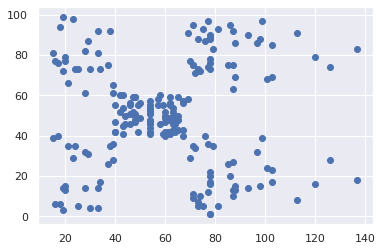

In [4]:
plt.scatter(shop['annual_income'], shop['spending_score'])

In [5]:
import sklearn
print(sklearn.__version__)

0.22.1


In [6]:
shop.count

<bound method DataFrame.count of      annual_income  spending_score
0               15              39
1               15              81
2               16               6
3               16              77
4               17              40
..             ...             ...
195            120              79
196            126              28
197            126              74
198            137              18
199            137              83

[200 rows x 2 columns]>

5 should be the number of clusters.

**TODO: Apply hierarchical clustering based on the number of clusters you pick from the dendrogram, and visualize the results using scatterplot.**

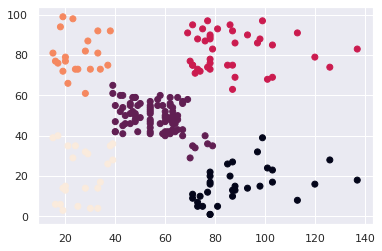

In [7]:
# TODO
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_ward = hc.fit_predict(shop)  

plt.scatter(shop['annual_income'], shop['spending_score'], c=y_ward)

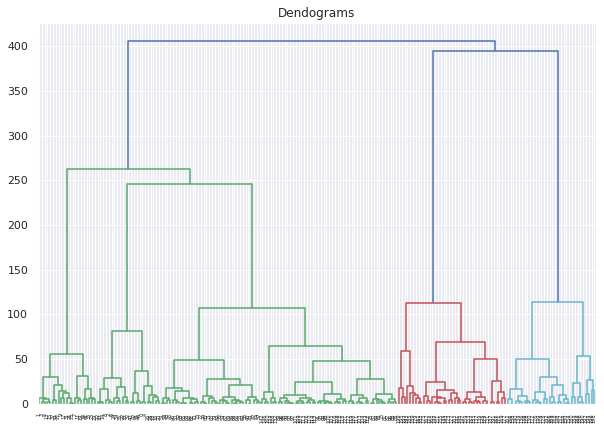

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(shop, method='ward'))  

### K-means Clustering
Then, we will apply k-means to the same data and visualize the results.

**TODO: Vary the number of K from 2 to 10 and plot the Sum of Squared Error (SSE) as K increases and pick up the value of K that makes sense.**

In [0]:
# TODO
from sklearn.cluster import KMeans

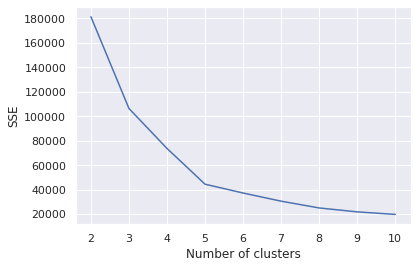

In [10]:
SSE = {}
for k in range(2,11):
    kmeans = KMeans(n_clusters=k).fit(shop)
    SSE[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

**TODO: Cluster the data using K-means based on the pre-defined value of K from the previous step and and visualize the results using scatterplot. **

In [0]:
# TODO
kmeans5 = KMeans(n_clusters=5)
y_k5 = kmeans5.fit_predict(shop)

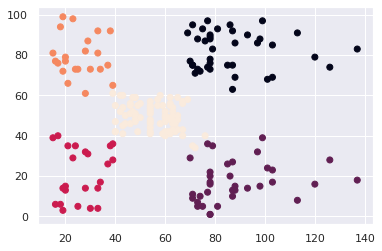

In [12]:
plt.scatter(shop['annual_income'], shop['spending_score'],c=y_k5)

## Problem 2: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

1. Kmeans: If randomly selecting k=3 and intitial centers are  150, 171 and 189. 
2nd iteration will be: K1 (17 28 50 60 80 89 150)/mean 46.7, K2 (167 171)/mean 169, K3 (189). 
3rd iteration will be: K1 (17 28 50 60 80 89)/mean 54, K2 (150 167 171)/mean 162.7, K3 (189). 

2. Single Linkage: 
Differences between 17 28 50 60 80 89 150 167 171 189 are [11,22,10,20,9,61,17,4,18], and the smallest difference of 4 between 167 and 171 will be merged as one data point (167/171).  

From 17 28 50 60 80 89 150 (167/171) 189, 2nd iteration's diffference is [11,22,10,20,9,61,17,18], then smallest difference of 9 between 80 and 89 will be merged as (80/89). 

From 17 28 50 60 (80/89) 150 (167/171) 189, 3rd iteration's diffference is [11,22,10,20,61,17,18], then smallest difference of 10 between 80 and 89 will be merged as (50/60). 

From 17 28 (50/60) (80/89) 150 (167/171) 189, 4th iteration's diffference is [11,22,20,61,17,18], then smallest difference of 9 between 80 and 89 will be merged as (17/28).

From (17/28) (50/60) (80/89) 150 (167/171) 189, 5th iteration's diffference is [22,20,61,17,18], then smallest difference of 9 between 80 and 89 will be merged as (150/167/171).
...
So at the end, the last iteration will be (17/28/50/60/80/89) (150 (167/171/189) with the biggest difference of 61.

3. Complete Linkage: 
Differences between 17 28 50 60 80 89 150 167 171 189 are [11,22,10,20,9,61,17,4,18]. The smallest difference between 167 and 171 is 4, and the largest difference between 89 and 150 is the largest. So, 167 and 171 will be merged as one data point (167/171). 

From 17 28 50 60 80 89 150 (167/171) 189, 2nd iteration's diffference is [11,22,10,20,9,61,21,22] (take the larger distance). The smallest difference between 80 and 89 is 9, and largest is between (28,50) and (167/171,189).  So, 80 and 89 will be merged as one data point (80/89). 

From 17 28 50 60 (80/89) 150 (167/171) 189, 3rd iteration's diffference is [11,22,10,29,70,21,22] (take the larger distance). The smallest difference between 50 and 60 is 10, so 50 and 60 will be merged as one data point (50/60). 

From 17 28 (50/60) (80/89) 150 (167/171) 189, 4th iteration's diffference is [11,32,39,70,21,22] (take the larger distance). The smallest difference between 17 and 28 is 11, so they will be merged as one data point (17/28). 

From (17/28) (50/60) (80/89) 150 (167/171) 189, 5th iteration's diffference is [43,39,70,21,22] (take the larger distance). The smallest difference between 150 and (167/171) is 21, so they will be merged as one data point (150/167/171).

From (17/28) (50/60) (80/89) (150/167/171) 189, 6th iteration's diffference is [43,39,91,39] (take the larger distance). The smallest difference is 39, and they will be merged as (50/60/80/89) and (150/167/171/189). And the 3 clusters would be (17/18),(50/60/80/89), (150/167/171/189).



## Bonus points
Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means. You can use paper title or abstract to build your features using [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model).

1. Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

2. Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

In [0]:
# Load the Relevant libraries
import sklearn as sk

# URL for the AAAI (UW Repository)
aaai_data = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/AAAI2014AcceptedPapers.csv")

# TODO